In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV



In [ ]:
df = pd.read_csv('data.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [4]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [5]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [6]:
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)
df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
df = df.join(pd.get_dummies(df.region, dtype=int)).drop('region',axis=1)
df


,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>],
       [<Axes: title={'center': 'northeast'}>,
        <Axes: title={'center': 'northwest'}>,
        <Axes: title={'center': 'southeast'}>],
       [<Axes: title={'center': 'southwest'}>, <Axes: >, <Axes: >]],
      dtype=object)

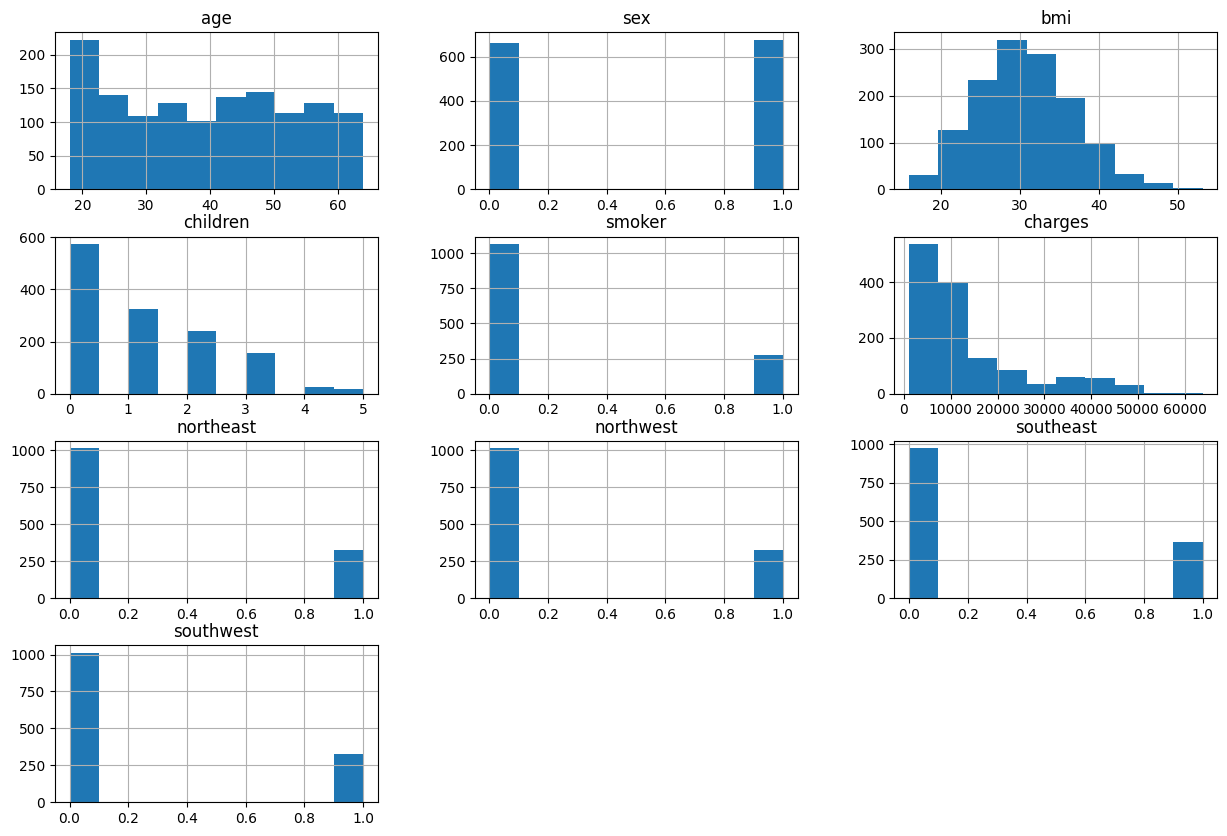

In [7]:
df.hist(figsize=(15,10))

In [8]:
# to check if there is any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northeast  1338 non-null   int64  
 7   northwest  1338 non-null   int64  
 8   southeast  1338 non-null   int64  
 9   southwest  1338 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 104.7 KB


<Axes: >

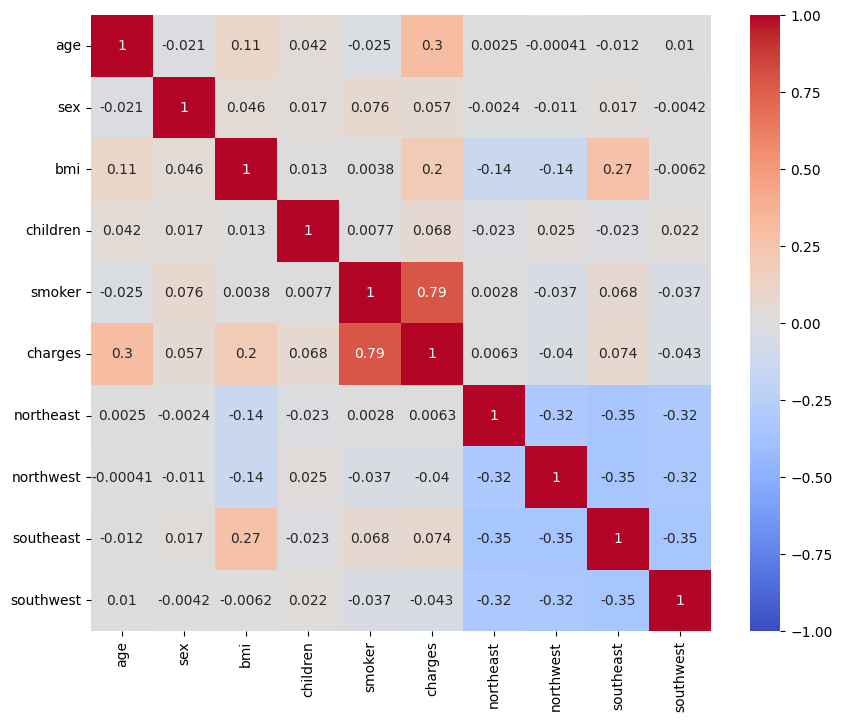

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)


In [10]:
X = df.drop('charges',axis=1)
Y = df['charges']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [11]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train,Y_train)

RandomForestRegressor(n_jobs=-1)

In [12]:
model.score(X_test,Y_test)

0.8125680376155598

In [13]:
Y_pred = model.predict(X_test)
rmse = root_mean_squared_error(Y_test,Y_pred)
rmse #it should be less as compare to terms given below like std of charges and Y_test, median

5254.109102847408

In [14]:
df.charges.std()

np.float64(12110.011236694001)

In [15]:
Y_test.std()

np.float64(12158.752747005718)

In [16]:
df.charges.median()

np.float64(9382.033)

In [17]:
mae = mean_absolute_error(Y_pred, Y_test)
mae 

2966.2478228726854

Text(0.5, 1.0, 'Prediction VS Truth')

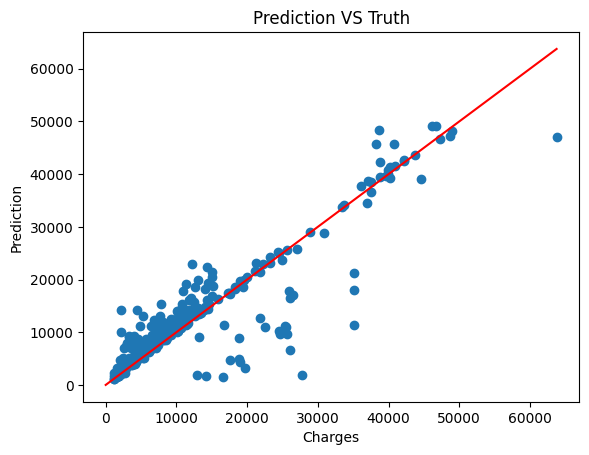

In [18]:
plt.scatter(Y_test,Y_pred)
plt.plot(np.linspace(0,max(Y_test)),np.linspace(0,max(Y_test)),c="r")
plt.xlabel('Charges')
plt.ylabel('Prediction')
plt.title('Prediction VS Truth')

In [19]:
features_importances = sorted(zip(model.feature_names_in_, model.feature_importances_),key=lambda x: x[1],reverse=True)
features_importances

[('smoker', np.float64(0.6215948558093433)),
 ('bmi', np.float64(0.20440965164068262)),
 ('age', np.float64(0.13330257740936524)),
 ('children', np.float64(0.01849288235541369)),
 ('sex', np.float64(0.0053510001806235915)),
 ('northeast', np.float64(0.0047294941054227945)),
 ('northwest', np.float64(0.004564091087504132)),
 ('southeast', np.float64(0.004318838748216487)),
 ('southwest', np.float64(0.0032366086634282843))]

Text(0.5, 1.0, 'Feature Importances')

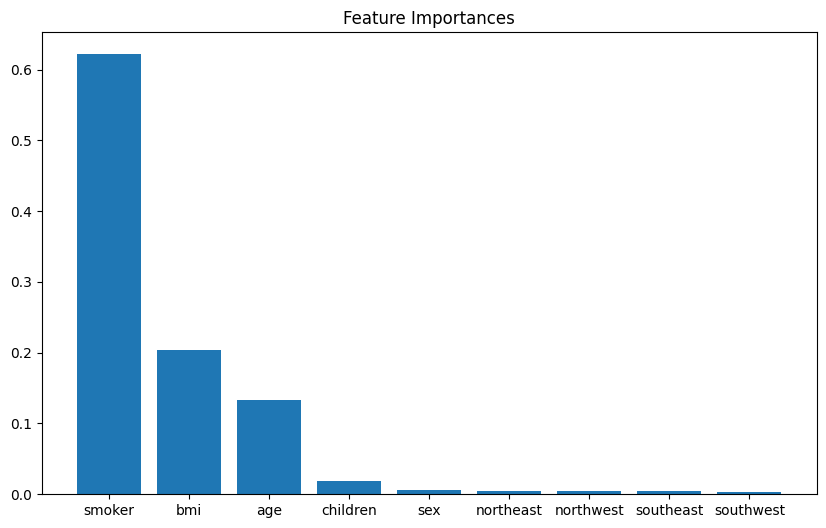

In [20]:
plt.figure(figsize=(10,6))
plt.bar([x[0] for x in features_importances], [x[1] for x in features_importances])
plt.title('Feature Importances')

In [21]:
param_grid = {
    'max_depth': [4,5,6],
    'min_samples_split': [3,4,5,6],
    'min_samples_leaf': [4,7,8,9]
}

model = RandomForestRegressor(n_jobs=1)

grid_search = GridSearchCV(model,param_grid=param_grid, cv=5)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=1),
             param_grid={'max_depth': [4, 5, 6],
                         'min_samples_leaf': [4, 7, 8, 9],
                         'min_samples_split': [3, 4, 5, 6]})

In [22]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 6}

In [23]:
model = grid_search.best_estimator_
model

RandomForestRegressor(max_depth=5, min_samples_leaf=7, min_samples_split=6,
                      n_jobs=1)

In [24]:
model.score(X_test,Y_test)

0.8407885368999631

In [25]:
Y_pred = model.predict(X_test)

In [26]:
rmse = root_mean_squared_error(Y_test,Y_pred)
rmse

4842.441996359665

In [27]:
mae = mean_absolute_error(Y_test,Y_pred)
mae

2689.3021824321686

Text(0.5, 1.0, 'Prediction VS Truth')

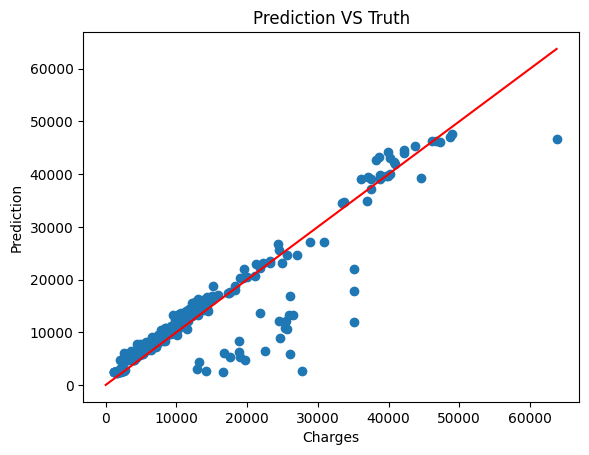

In [28]:
plt.scatter(Y_test,Y_pred)
plt.plot(np.linspace(0,max(Y_test)),np.linspace(0,max(Y_test)),c="r")
plt.xlabel('Charges')
plt.ylabel('Prediction')
plt.title('Prediction VS Truth')